In [3]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

# データのロード、マージ
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

/Users/sho/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [4]:
# 説明変数、目的変数
X = df.iloc[:, :-1].values
y = df.loc[:, 'MEDV'].values
# 学習用、検証用データに分割
from sklearn.cross_validation import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 666)


/Users/sho/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
X_train = X[:-100]
X_test = X[-100:]

y_train = y[:-100]
y_test = y[-100:]

In [6]:
# 必要なライブラリのインポート
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [7]:
# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )


MSE train : 1.595, test : 18.682
MSE train : 0.982, test : 0.271


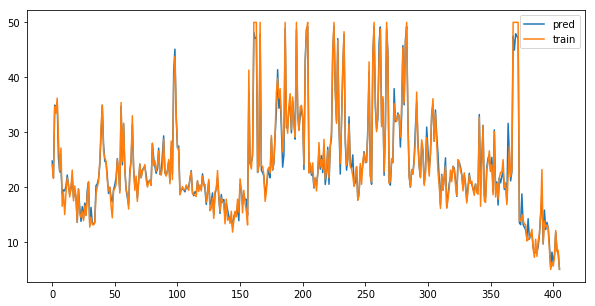

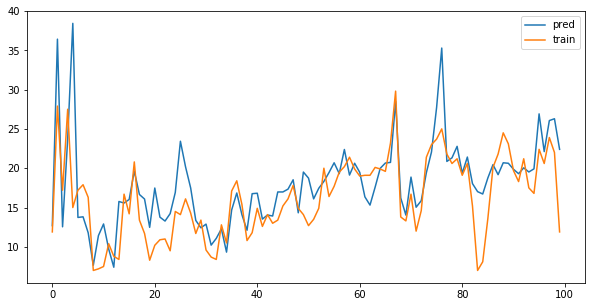

In [8]:
plt.figure(figsize=(10,5))
plt.plot(y_train_pred,label="pred")
plt.plot(y_train,label="train")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(y_test_pred,label="pred")
plt.plot(y_test,label="train")
plt.legend()
plt.show()

In [9]:
# モデル構築、パラメータはデフォルト
forest2 = RandomForestRegressor(n_estimators=1000)
forest2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [10]:
# 予測値を計算
y_train_pred2 = forest2.predict(X_train)
y_test_pred2 = forest2.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred2), mean_squared_error(y_test, y_test_pred2)) )
# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred2), r2_score(y_test, y_test_pred2)) )

MSE train : 1.454, test : 19.168
MSE train : 0.983, test : 0.252


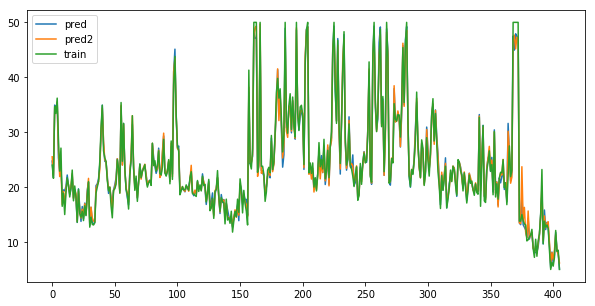

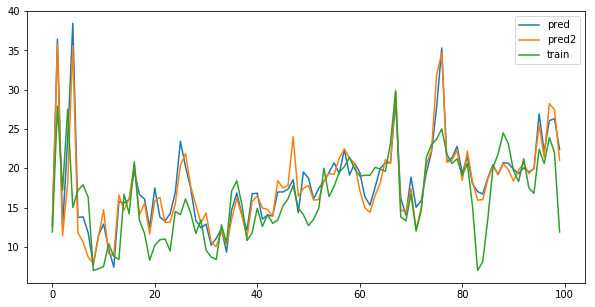

In [11]:
plt.figure(figsize=(10,5))
plt.plot(y_train_pred,label="pred")
plt.plot(y_train_pred2,label="pred2")
plt.plot(y_train,label="train")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(y_test_pred,label="pred")
plt.plot(y_test_pred2,label="pred2")
plt.plot(y_test,label="train")
plt.legend()
plt.show()

In [12]:
svr = SVR(kernel='linear', C=10)
svr.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
# 予測値を計算
y_train_pred_svr = svr.predict(X_train)
y_test_pred_svr = svr.predict(X_test)

# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred_svr), mean_squared_error(y_test, y_test_pred_svr)) )
# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred_svr), r2_score(y_test, y_test_pred_svr)) )

MSE train : 26.169, test : 27.526
MSE train : 0.698, test : -0.075


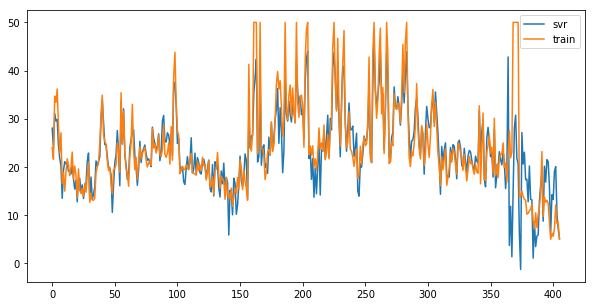

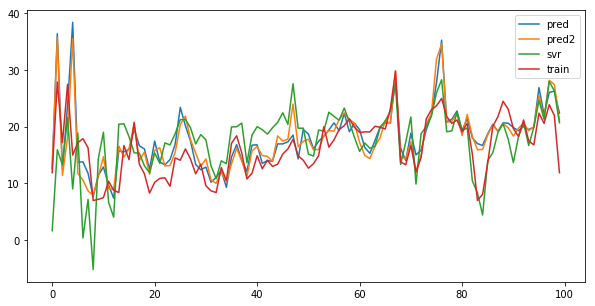

In [14]:
plt.figure(figsize=(10,5))
#plt.plot(y_train_pred,label="pred")
#plt.plot(y_train_pred2,label="pred2")
plt.plot(y_train_pred_svr,label="svr")
plt.plot(y_train,label="train")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(y_test_pred,label="pred")
plt.plot(y_test_pred2,label="pred2")
plt.plot(y_test_pred_svr,label="svr")
plt.plot(y_test,label="train")
plt.legend()
plt.show()